<div style="position:relative;">
<img src=images/numpylogo_med.png style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=images/numpylogo_med.png style="width: 60px; float: right" />
</div>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NumPy



By convention the numpy package is usually imported as **np**

In [1]:
import numpy as np

## ndarray

The basic building block is the **ndarray** class provided by the NumPy package.

An **ndarray** is an n-dimensional array of values of a specific **data type**.

In [3]:
np.array([1.3, 20.1, 33.5], dtype=np.float64)

array([  1.3,  20.1,  33.5])

In [4]:
np.array([1.3, 20.1, 33.5], dtype=np.int64)

array([ 1, 20, 33])

In [5]:
np.array([1.3 + 5j, -12, 2j], dtype=np.complex64)

array([  1.29999995+5.j, -12.00000000+0.j,   0.00000000+2.j], dtype=complex64)

N-dimensional arrays can be constructed from nested lists.

The **shape** of the **ndarray** describes the size of each dimension.

In [6]:
array_2d = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
print(array_2d, array_2d.shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]] (3, 3)


In [7]:
array_1d = np.arange(1, 10)
print(array_1d, array_1d.shape)

[1 2 3 4 5 6 7 8 9] (9,)


In [8]:
array_2d = array_1d.reshape((3, 3))
print(array_2d, array_2d.shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]] (3, 3)


There are numerous ways to create ndarrays. Some examples

In [10]:
np.ones((2, 3, 4))

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

In [11]:
np.linspace(-1, 1, 21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [18]:
np.random.normal(size=(1000,3))

array([[-0.42132933, -0.54437989,  0.20051274],
       [-0.45808946,  0.53672342,  0.36891573],
       [ 2.45623873, -0.77889665,  0.35667594],
       ..., 
       [-1.06108694, -0.34526844, -0.71108047],
       [ 0.13664369, -0.55854102,  0.89526294],
       [ 0.94375578, -0.44654899, -0.78584755]])

### Computation

numpy defines mathematical operations and functions which can directly applied to **ndarray**s.

In [20]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
x + x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [23]:
x ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [24]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [25]:
np.sin(x)**2 + np.cos(x)**2

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### The Golden Rule: Avoid Loops in Python

In [34]:
x = np.arange(1, 1000001)

If you are new to Python and NumPy you are likely to produce the following code

In [35]:
%%timeit
mysum = 0
for element in x:
    mysum += element

1 loop, best of 3: 210 ms per loop


Using the builtin sum function will still result in a loop done by Python

In [36]:
%timeit sum(x)

10 loops, best of 3: 178 ms per loop


You are (literately) a hundred times faster by letting NumPy do the loop

In [37]:
%timeit np.sum(x)

100 loops, best of 3: 1.6 ms per loop


### Broadcasting

If you operate on arrays with different shapes, numpy will broadcast them for you.

More on this topic can be found here: https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html

In [49]:
vector = np.array([1,2,3])
vector.shape

(3,)

In [82]:
(vector * vector).shape

(3,)

In [81]:
np.dot(vector, vector).shape

()

In [83]:
np.outer(vector, vector).shape

(3, 3)

In [84]:
matrix = np.array([[1,2,3],[4,5,6]])
matrix.shape

(2, 3)

In [85]:
(matrix * matrix).shape

(2, 3)

In [92]:
np.dot(matrix.T, matrix).shape

(3, 3)

In [93]:
np.dot(matrix, matrix.T).shape

(2, 2)

In [98]:
np.outer(matrix, matrix).shape

(6, 6)

In [89]:
(matrix * vector).shape

(2, 3)

In [90]:
np.dot(matrix, vector).shape

(2,)

In [102]:
np.outer(matrix, vector).shape

(6, 3)

## Example 1: Fisher's Discriminant

Consider two two-dimensional gaussian distributions for signal and background

In [124]:
def plot_data(signal, background, fisher=None, neuralnet=None):
    import matplotlib.pyplot as plt
    plt.scatter(signal[:, 0], signal[:, 1], alpha=0.3)
    plt.scatter(background[:, 0], background[:, 1], alpha=0.3)
    if fisher is not None:
        plt.plot([-fisher[0]*3,fisher[0]*3],[-fisher[1]*3,fisher[1]*3], 'k-',lw=4)
    if neuralnet is not None:
        support = np.arange(-5.0, 5.5, 0.5)
        X, Y = np.meshgrid(support, support)
        R = np.array([[float(neuralnet.predict(np.array([[x, y]]))) for x in support] for y in support])
        plt.contourf(X, Y, R ,alpha=0.5)
    plt.show()

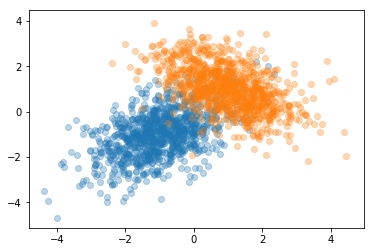

In [111]:
N = 1000
signal     = np.random.multivariate_normal([-1.0,-1.0],[[1.0,0.5],[0.5,1.0]],(N,))
background = np.random.multivariate_normal([1.0,1.0],[[1.0,-0.5],[-0.5,1.0]],(N,))
plot_data(signal, background)

We calculate Fisher's discriminant:
$$ \vec{d} = \frac{\vec{\mu}_S - \vec{\mu}_B}{\Sigma_S + \Sigma_B}$$

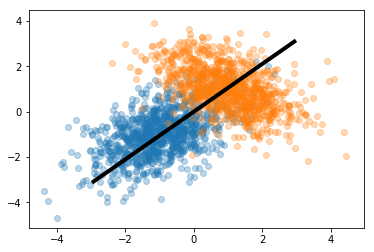

In [137]:
from numpy.linalg import inv
numerator = np.mean(signal, axis=0) - np.mean(background, axis=0)
denominator = np.cov(signal.T) + np.cov(background.T)
fisher = np.dot(inv(denominator), numerator)

plot_data(signal, background, fisher=fisher)

## Example 2: Neural Network

** Feed Forward **
$$ a_h = \sum_i w_{hi} x_i $$
$$ x_h = \tanh{a_h}$$
$$ a_o = \sum_h w_{oh} x_h $$
$$ x_o = \tanh{a_o}$$

**Backpropagation Algorithm**

$$\frac{\mathrm{d}E}{\mathrm{d}w} = \frac{\partial E}{\partial x} \cdot \frac{\partial x}{\partial a} \cdot \frac{\partial a}{\partial w}$$

** Output Layer **
$$E \left( x_o \right) = \frac{1}{2} \left( x_o - t \right)^2 $$

** Hidden Layer **
$$E \left( x_h \right) = E \left( x_o(x_h) \right)$$

In [135]:
class NeuralNetwork(object):
    def __init__(self, n_input, n_hidden):
        self.w_hi = np.random.normal(size=(n_input, n_hidden))
        self.w_oh = np.random.normal(size=n_hidden)

    def fit(self, x_i, t):
        for step in range(1, 1000):
            # Propagate input through hidden and output layer
            a_h = np.dot(x_i, self.w_hi)
            x_h = np.tanh(a_h)
            a_o = np.dot(x_h, self.w_oh)
            x_o = np.tanh(a_o)
            # Back-Propagate error signal
            d = lambda x: 4*np.cosh(x)**2/(np.cosh(2*x) + 1)**2
            e_o = d(a_o)*(x_o - t)
            e_h = d(a_h)*np.outer(e_o, self.w_oh)
            # Update weights
            self.w_oh -= 0.01 * np.dot(e_o.T, x_h)
            self.w_hi -= 0.01 * np.dot(x_i.T, e_h)

    def predict(self, x_i):
        # Propagate input trough hidden layer
        x_h = np.tanh(np.dot(x_i, self.w_hi))
        # Propagate output of hidden layer through output layer
        return np.tanh(np.dot(x_h, self.w_oh))

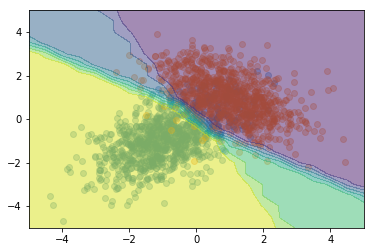

In [138]:
nn = NeuralNetwork(2, 4)
nn.fit(np.vstack([signal, background]),
       np.hstack([np.ones(N), -np.ones(N)]))
plot_data(signal, background, neuralnet=nn)

## Exercise 

http://docs.scipy.org/doc/numpy/reference/arrays.html

http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

http://docs.scipy.org/doc/numpy/reference/routines.html


#### Task 1
Create 1000 random numbers between -10 and 10 and extract the largest and the smallest value


#### Task 2

Draw 1 million numbers from a normal disbtribution with mu=0 and sigma=2 and compute the function

$f(x)=exp(x*\frac{3}{2})+x$

using NumPy's facilities. What is the mean value and the standard deviation of the resulting values ?